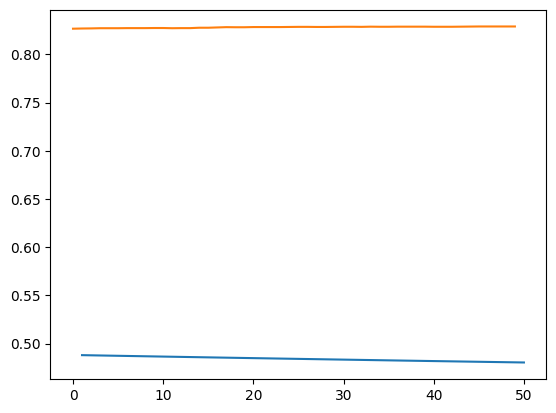

-0.00015201687812805176
4.599999999999938e-05


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


csv_path = '/home/SayMyName/桌面/GitHub/MyCode/DeepLearn/PyTorch/PyTorch_code_7_CSV/PyTorch_code_7_1.csv'

df = pd.read_csv(csv_path)
data_dict = df.to_dict(orient='list')

epoch = data_dict.get('Epoch')
loss = list(data_dict.get('Test_Loss'))
correctness = list(data_dict.get('Correctness'))
# print(type(epoch[0]))


# print(loss)
# print(correctness)

x = np.linspace(epoch[0], epoch[-1], len(epoch))
# x = int(x)
# y = np.sin(x)
# y = np.log10(x)
# y1 = loss
# y2 = loss


fig, ax = plt.subplots()
ax.plot(x, loss, correctness)
plt.show()

loss_k = (loss[-1] - loss[0]) / len(loss)
correctness_k = (correctness[-1] - correctness[0]) / len(correctness)
print(loss_k)
print(correctness_k)



In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib notebook

x, y = [x_i for x_i in range(0, 10001)], []
k, b = 2.5, 3
for x_i in x:
    bias = random.uniform(-0.26, 0.25)
    y_i = k * x_i + b + bias
    y.append(y_i)

x, y = np.array(x), np.array(y)

x_mean = np.mean(x)
y_mean = np.mean(y)

sum1 = np.sum((y - y_mean) * (x - x_mean))
sum2 = np.sum((x - x_mean ** 2))

k_ = sum1 / sum2
b_ = y_mean - k_ * x_mean
print(f"线性回归方程： y = {k_} * x + {b_}")


x = np.linspace(x[0], x[-1], len(x))
y_ = k_ * x + b_
fig, ax = plt.subplots()
ax.plot(x, y, y_)
plt.show()









线性回归方程： y = -0.8336668846320094 * x + 16671.33140267971


<IPython.core.display.Javascript object>

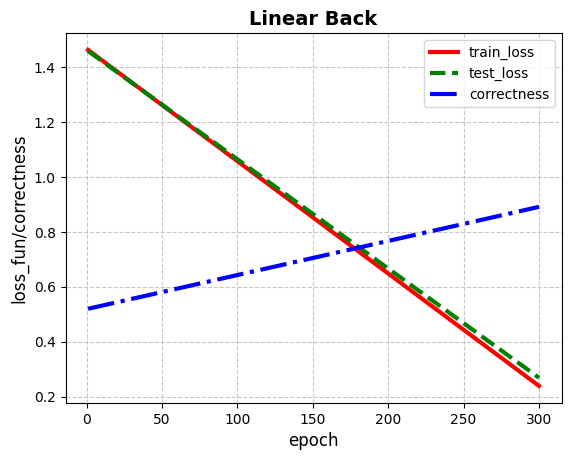

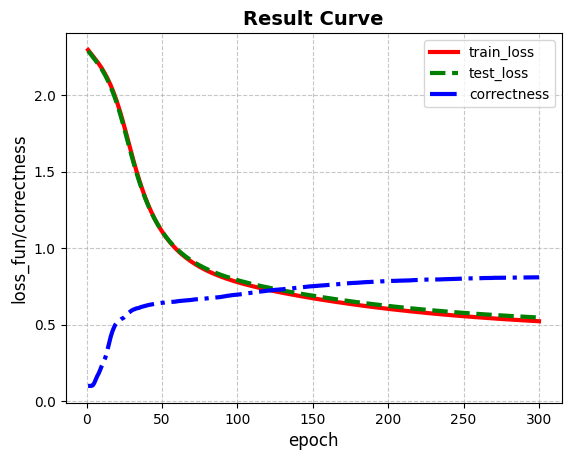

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def load_data():
    csv_path = "/home/SayMyName/桌面/GitHub/MyCode/DeepLearn/PyTorch/PyTorch_code_7_CSV/PyTorch_code_7_3.csv"
    csv_file = pd.read_csv(csv_path)
    dt_dict = csv_file.to_dict(orient='list')

    epoch = dt_dict.get('Epoch')
    train_loss = dt_dict.get('Train_Loss')
    test_loss = dt_dict.get('Test_Loss')
    correctness = dt_dict.get('Correctness')
    return epoch, train_loss, test_loss, correctness

def linear_back(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num1, num2 = np.sum((x - x_mean) * (y - y_mean)), np.sum((x - x_mean) ** 2)
    k = num1 / num2
    b = y_mean - k * x_mean
    return k, b


def compute_linear_back(epoch, train_loss, test_loss, correctness):
    train_k, train_b = linear_back(epoch, train_loss)
    test_k, test_b = linear_back(epoch, test_loss)
    correctness_k, correctness_b = linear_back(epoch, correctness)
    return train_k, train_b, test_k, test_b, correctness_k, correctness_b


def figure_linear(epoch,  train_k, train_b, test_k, test_b, correctness_k, correctness_b):
    epochs = len(epoch)
    x = np.linspace(epoch[0], epoch[-1], epochs)
    Y_train = train_k * x + train_b
    Y_test = test_k * x + test_b
    Y_correctness = correctness_k * x + correctness_b
    fig, ax = plt.subplots()
    ax.plot(x, Y_train, color='red', lw=3, ls='-', label='train_loss')
    ax.plot(x, Y_test, color='green', lw=3, ls='--', label='test_loss')
    ax.plot(x, Y_correctness, color='blue', lw=3, ls='-.', label='correctness')
    ax.legend(loc='upper right')
    ax.set_title('Linear Back', fontsize=14, fontweight='bold')
    ax.set_ylabel('loss_fun/correctness', fontsize=12)
    ax.set_xlabel('epoch', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    # ax.text(50, 2.5, 'Hello, Kimi!', fontsize=10, color='white', ha='center', va='center')
    plt.show()
    return


def figure_curve(epoch, train_loss, test_loss, correctness):
    epochs = len(epoch)
    x = np.linspace(epoch[0], epoch[-1], epochs)
    fig, ax = plt.subplots()
    ax.plot(x, train_loss, color='red', lw=3, ls='-', label='train_loss')
    ax.plot(x, test_loss, color='green', lw=3, ls='--', label='test_loss')
    ax.plot(x, correctness, color='blue', lw=3, ls='-.', label='correctness')
    ax.legend(loc='upper right')
    ax.set_title('Result Curve', fontsize=14, fontweight='bold')
    ax.set_ylabel('loss_fun/correctness', fontsize=12)
    ax.set_xlabel('epoch', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    return


def main():
    epoch, train_loss, test_loss, correctness = load_data()
    train_k, train_b, test_k, test_b, correctness_k, correctness_b = compute_linear_back(epoch, train_loss, test_loss, correctness)
    figure_linear(epoch, train_k, train_b, test_k, test_b, correctness_k, correctness_b)
    figure_curve(epoch, train_loss, test_loss, correctness)
    return 0

if __name__ == '__main__':
    main()







